In [1]:
#Import libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# from sklearn.cross_validation import KFold
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import spline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge

In [2]:
boston = load_boston()
print(boston.data.shape)
boston.keys()

(506, 13)


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:

boston_data = pd.DataFrame(boston['data'], columns=boston.feature_names)
boston_target = pd.DataFrame(boston['target'], columns={'Target'})
# print(boston_data.head(2))
# print(boston_target.head(2))

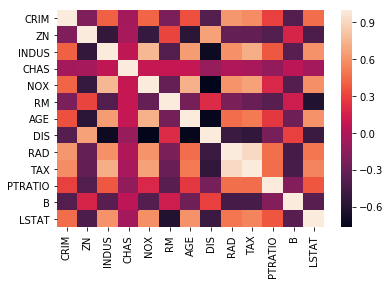

In [4]:
#Visualize correlation between attributes by using heatmap
sns.heatmap(boston_data.corr())

In [5]:
# Feature contains high correlation. We need to remove them first before applying regression techniques.
# Create correlation matrix
abs_corr_matrix = boston_data.corr().abs()

In [6]:
# Select upper triangle of matrix
up_tri = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(np.bool))

# Find all the features which is having correlation > 0.75 with other features.
correlated_features = [column for column in up_tri.columns if any(up_tri[column] > 0.75)]

#Print correlated_features
print(correlated_features)


['NOX', 'DIS', 'TAX']


In [7]:
#Drop correlated features:

boston_data = boston_data.drop(correlated_features, axis=1)

In [8]:
#Divide the data into training and test set. Train set contains 80% of the data. Test set contains 20% of the data.

X_train, X_test, Y_train, Y_test = train_test_split(boston_data, boston_target, test_size=0.20)

In [9]:
ridge_regression = Ridge()

In [10]:
# fit the model
ridge_regression.fit(X_train,Y_train)

# Predicciones

pred = ridge_regression.predict(X_test)

In [11]:
# Mean absoulte error
print('Mean absolute error: %.2f' % mean_absolute_error(Y_test,pred))

Mean absolute error: 3.23


Combinacion de parámetros para obtener mejores resultados:
- alpha: Regularización de strength. Tuning de parámetros que controla

- normalize: Boolean, Normaliza los datos (o no)

- max_iter: iteraciones

- solve: {'auto','saga','lsqr','sparse_cg','svd','cholesky', 'sag'}

### Ridge Regresssion modificada

In [12]:
ridge_regression = Ridge(alpha=0.2, normalize=True, max_iter=1000, solver='cholesky')

# fit the model
ridge_regression.fit(X_train,Y_train)

# Predicciones
pred = ridge_regression.predict(X_test)

# Mean absoulte error
print('Mean absolute error: %.2f' % mean_absolute_error(Y_test,pred))

Mean absolute error: 3.33


### K-Fold Cross Validation

consiste en dividir el dataset de train en distintas particiones iguales (5) por ejemplo y entrenar el modelo K veces. Ojo, esto puede ser muy costoso a nivel computacional.

Para ello entrenamos el modelo para utilizando la tecnica __Leave One Out Cross Validation__ Normalmente K es 5, 10 o 20

Ridge Regression ayuda a reducir el sobreajuste `overfitting` podemos aplicar un penalty alto.

In [13]:
# funcion que obtiene el numero de grados, train and test y genera la curva de regresion
def ridge_regression_grado(X_train, Y_train, X_test, Y_test, degree, alpha):
    # make pipeline for higher degree
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    model.fit(pd.DataFrame(X_train), pd.DataFrame(Y_train))
    
    # change training and test data as requirement
    X_test = pd.DataFrame(X_test,columns=['X'])
    X_test = X_test.sort_values(by=['X'])
    Y_test = pd.DataFrame(Y_test)
    Y_test = Y_test.ix[X_test.index]
    
    # Generate prediccitions
    Y_pred = model.predict(X_test)
    # Perform spline smoothing. Higher degree lines will be much smooth
    smooth_feature = np.linspace(np.min(X_test['X'].tolist()), np.max(X_test['X'].tolist()),1000)
    smooth_points = spline(X_test['X'].tolist(), Y_pred, smooth_feature)
    
    # plot the curve
    plt.scatter(X_test, Y_test, color='blue')
    plt.plot(smooth_feature,smooth_points,'-g')
    plt.title('Mean absolute error: %.4f' % mean_absolute_error(Y_test,Y_pred))

In [ ]:
# grado 16 y alpha 0
ridge_regression_grado(X_train, Y_train, X_test, Y_test, 16, 0)

In [ ]:
# grado 16 y alpha 0.01
ridge_regression_grado(X_train, Y_train, X_test, Y_test, 16, 0.01)

In [ ]:
# grado 16 y alpha 1
ridge_regression_grado(X_train, Y_train, X_test, Y_test, 16, 1)

In [ ]:
# grado 16 y alpha 100
ridge_regression_grado(X_train, Y_train, X_test, Y_test, 16, 100)